# Is Black-Box Modeling the Future of Macroeconomic Forecasting?

Sahil Nisar (sn3028@nyu.edu)

Suniya Raza (sr5748@nyu.edu)

Vinicius Moreira (vgm236@nyu.edu)

Graduate School of Arts and Science (GSAS) at New York University (NYU)

2022

PLACEHOLDER FOR SUMMARY

In [1]:
#Packages
import fredapi as fa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

%matplotlib inline

## 1. Introduction 

Forecasting macroeconomic and financial variables has always been a challenge, especially since this requires forecasters to make discretionary choices about the data and methodology. Even though most choices have their basis in economic intuition and judgment, there is a high possibility that the assumptions made could be flawed. This concern has been aggravated especially due to the inability of traditional methods to accurately perform during unprecedented times such as the global financial crises in 2008 or the recent COVID-19 pandemic. The predictors and models that have proved to be useful for predictions in normal times have failed to generate appropriate insights during the time of crises. 

Machine Learning (ML) techniques on the other hand, automate most of the choices regarding model selection and specifications, allowing the algorithm to learn from the data without any programmer explicitly specifying every step in the model. The ability of Machine Learning techniques to identify the non-linearities that exist in data series as well as how variables interact with each other, has contributed to the predictive power of these models. In today’s world, machine learning algorithms are successfully and widely used for sales forecasting, predicting stock prices, designing banking softwares to detect frauds and by search engines to make personalized recommendations based on search history. The discretionary nature of traditional forecasting models as well as the high predictive power of ML techniques has led macroeconomic forecasters to turn their attention to the development and application of Machine Learning techniques to forecast the macroeconomic variables. Moreover, with increased availability of “big data” in economics, the development of machine learning techniques for macroeconomic forecasting is turning out to be promising.

While the formulation of the machine learning techniques dates to the 1950’s, its application to macroeconomics is still in the development phase. This has a lot to do with the fact that the predictive power of the ML algorithms is contingent on the availability of data. The frequency with which most of the key macroeconomic variables are reported is quarterly, and that limits the number of observations available to make good predictions using the ML algorithms. To put things in perspective, the data on stock prices is updated in real time which means that the available observations are in abundance. However, with the evolution of time, enough data has accumulated to make use of ML for macroeconomic forecasting.

In this paper, we aim to provide a comparative analysis of the traditional time series models with the machine learning models to forecast the US Gross Domestic Product (GDP) growth rate. GDP is the total amount of goods and services produced within the confines of the country in the specified period. It is generally considered to be a good proxy for the wealth of the economy and hence drives a lot of decision-making processes (Provost and Fawcett, 2013). This makes GDP forecasting a key and a relevant issue in macroeconomics. In this research, we aim to study varying classical time series and machine learning algorithms and apply them to forecast US real GDP growth rate. The goal is to assess the performance of each of these models and understand which model provides the best and robust forecast in the specified setting. 

For the classical time series models, we have mainly used the Auto-Regressive (AR), Moving-Average (MA), Auto-Regressive-Integrated-Moving-Average (ARIMA) and Seasonal ARIMAX (SARIMAX). For the Machine Learning models, we have used the K-Nearest Neighbor (KNN), Random Forest, Neural Networks, Principal Component Analysis (PCA) and the Dynamic Factor Model. Finally, to assess the performance of the models we have used the Root Mean Squared Error (RMSE). We are particularly interested in observing the accuracy of the estimates provided by each of our models for the specified forecasting horizon. 


The rest of the paper is organized as follows: Section 2 dives deeper into the existing literature available on the application of machine learning in macro forecasting, Section 3 provides some insights into the summary statistics of the data used, Section 4 lays out our forecasting methods and specifications, Section 5 demonstrates our empirical results and analysis, Section 6 talks about the limitations of our models and Section 6 concludes.

Further details and code of the models and transformation used can be found in this GitHub link: https://github.com/vgm236/Special_Project_Moreira_Raza-Nisar.

## 2. Literature Review

The intersection of Machine Learning (ML) with econometrics has recently gained prominence in macroeconomic application, especially due to the increase in the availability of large datasets. Even though only recently there has been a surge in the number of studies which apply ML techniques for macroeconomic forecasting (cite), machine learning does have a long history in macro-econometrics. 

A 1993 study tested the adequacy of using linear models for forecasting time series by using a popular ML model, Neural Networks to check for neglected non-linearities in time series. The results showed that neural network test performs as well or better than standard tests and helps prove the presence of non-linearities in data series (Lee et al. (1993)). Swanson and White also use Artificial Neural Networks and other linear models to evaluate how useful these approaches are to predict nine macroeconomic variables (Swanson and White (1997)). 

A 1999 working paper has also tested the forecasting performance of neural network model in predicting GDP at 1-quarter and 4-qaurter forecast horizons, with only the 4-quarter horizon results showing statistically significant forecasting accuracy over linear model counterparts (Tkacz and Hu (1999-2003), cite ). Similarly, another paper focused on using neural networks to forecast Canada’s real GDP growth and concluded that for both in-sample and out-of-sample periods, this model performed better than the traditional linear regression models. However, in this case the author was unable to prove that the improvement in forecasting accuracy was statistically significant (Gonzalez, 2000-2007, cite). 

In recent years, the interest in neural networks has increased because of its potential to identify and reproduce linear and non-linear relationships among a set of variables. A recent paper by researchers at the Federal Reserve Bank of Kansas City has explored the potential of deep neural networks in improving the forecasting accuracy of macroeconomic variables, despite the existence of limited data. The results show that the model outperforms benchmark models at forecasting civilian unemployment at short horizons (Cook et all, 2017). In our research, we aim to explore this ML technique using recent data of GDP growth rates, especially in context to shocks such as the financial crises and the COVID-19 pandemic. 

Another technique, the non-parametric K Nearest Neighbor (KNN) is one of the oldest and most researched ML models and is known for its consistency property (Stone(1977)). KNN has the ability to identify repeated patterns within time series and is widely used in financial time series modeling (Ban et all (2013)). KNN has gained popularity in predicting macroeconomic variables, since it retains its consistency properties even in cases of limited past information i.e., few data points. As compared to other artificial intelligence methods, which require a minimum number of observations to perform adequately, KNN application is not severely hindered by this limitation ((Diebold and Nason, 1990). A recent research paper compares GDP forecasts from KNN model with results from basic time series models such as Autoregressive (AR), Autoregressive Integrated Moving Average (ARIMA), Seasonal AR and ARIMA and AR and ARIMA with covariates. The study concludes that KNN captures the self-predictive ability of GDP better than other traditional models (Maccarrone et all, 2021, cite). These results are promising, especially since the data used covers the financial crisis and pandemic time period. Another paper compares KNN technique with two other ML techniques, the Random Forest and Extreme Gradient Boosting for predicting inflation in Costa Rica and concludes that KNN outperforms these models based on forecast accuracy (Rodriguez-Vargas, 2020). 

Random Forest algorithms are widely used in medical research and biological studies. This technique is known for its prediction accuracy and robustness since it can handle a very large number of input variables without overfitting. However, it is not as widely used in macroeconomic forecasting yet. Baiu and D’Elia (2011) have used Random Forest model to forecast the quarterly GDP growth rate for the Euro region and concluded that while RF fails to outperform standard AR model in predicting growth rate, it can be used as a tool to select the most relevant predictive variables.

Principal Component Analysis(PCA) is a machine learning technique used specifically when there is a large amount of data available. Large datasets not only make computation hard but also make it difficult to interpret. PCA tends to reduce the dimensionality of such datasets, while at the same time ensuring that the information loss is minimum. The way it achieves that is by creating new uncorrelated variables in order to attain maximum variance. PCA essentially reduces the problem to solving eigenvalues and eigenvectors. Stock and Watson have proved that under the general conditions on the error terms, principal components of X (explanatory variables) are a consistent estimator of the true latent factors. In their research, Stock and Watson tried to forecast the Federal Reserve Board’s Index of Industrial Production using the PCA approach and found that the model outperforms univariate AR and VAR models (Stock and Watson, 2002). 

Alternatively, another variation of the PCA is the dynamic factor models (DFMs). DFM’s have gained prominence over the last decade mainly because of their ability to model sequential datasets consistently, specially when the number of series exceeds the number of time series observations. DFM’s were first introduced by Geweke (1977) as an addendum to time series factor models which were mainly developed for cross-sectional data. The idea of DFM’s is similar to the PCA, except that they introduce the dynamic part to it. Sargent and Sims (1977)’s work has extensively examined the macroeconomic variables using the dynamic factor model and have found that the models have the potential to explain a large variation in them (Stock and Watson, 2010). 


Classical time series forecasting models such as AR, MA, ARIMAX and SARIMAX have always remained the go to models for the forecasters mainly because they are structured. However, with the advancement of machine learning techniques, the classical time series forecasting models are now becoming benchmark models to which the other non-traditional models of forecasting are compared. Classical time series models mainly rely on assumptions about the distribution of the error terms and linear relationship between the dependent and independent variables. Some complex time series models modify these assumptions somewhat, but the structure is still imposed. ARIMAX model accounts for the stationarity of the data and makes use of other explanatory variables and SARIMAX accounts for the seasonality on top of ARIMAX. 

One of the advantages of classical time series models over machine learning models is that they provide a useful interpretation because of the parametrization as opposed to ML. On the other hand, multivariate time series models tend to increase the complexity mainly because of the non-linearity. According to Banerjee and Marcellino, univariate linear models tend to be often more robust than their multivariate counterparts (Banerjee and Marcellino, 2006).  However, this doesn’t imply that multivariate models are not useful. For the purpose of our analysis, we will be using the combination of both univariate and multivariate time series models. The idea is to use the classical time series models as a benchmark because they have been regarded as the gold standard for forecasting and have been widely used for over many years for macroeconomic forecasting.

## 3. Data and Summary Statistics

### 3.1 Data description

The source of the data used in this paper is the Fred, a database created and maintained by the Research Department at the Federal Reserve Bank of St. Louis. The database consists of hundreds of thousands of economic data time series from scores of national, international, public, and private sources. Our models will be univariate and multi-variate, in which case we will use the monthly variables for the US, and their transformations, to predict the US GDP growth. We got eleven monthly data series and one quarterly data series, the GDP. All of these series are seasonally adjusted. 

The series labeled "payroll" is the Total Nonfarm Payroll, a measure of the number of U.S. workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed. This measure accounts for approximately 80 percent of the workers who contribute to Gross Domestic Product (GDP). The Bureau of Labor Statistics (BLS) adjusts the data to offset the seasonal effects to show non-seasonal changes.

The series labeled "job_openings" is the Total Nonfarm Job Openings, which measures all jobs that are not filled on the last business day of the month. A job is considered open if a specific position exists and there is work available for it, the job can be started within 30 days, and there is active recruiting for the position. Total Nonfarm Job Openings are measured by the Job Openings and Labor Turnover Survey (JOLTS) and published by the Bureau of Labor Statistics (BLS).

The series named "quits" measures the employees who left voluntarily, with the exception of retirements or transfers to other locations. This numbers is divided by the total employment to return the quits rate. 

For "ip" we collect the industrial production of the US, the Board of Governors of the Federal Reserve System. It measures real output for all facilities located in the United States manufacturing, mining, and electric, and gas utilities (excluding those in U.S. territories). The series is determined from 312 individual series based on the 2007 North American Industrial Classification System (NAICS) codes.

On "vehicle_sales" is the vehicle sales data for the US, also seasonally adjusted, and published by the U.S. Bureau of Economic Analysis. The seasonally adjusted series includes auto (all passenger cars, including station wagons) and truck sales data.

We classify as "retail" the Advance Retail and Food Services Sales, deflated using the Consumer Price Index for All Urban Consumers. As the other series, it is also seasonally adjusted.

Also, for "wholesale_inventories" which measures the inventories of wholesalers, not including retailers. The estimates are based on data from three surveys: the Monthly Retail Trade Survey, the Monthly Wholesale Trade Survey, and the Manufacturers' Shipments, Inventories, and Orders Survey.

We use sentiment data as well, with the "consumer_sentiment" data is the Consumer Sentiment indicator measured by the University of Michigan. To calculate the Index of Consumer Sentiment (ICS), the University computes the relative scores (the percent giving favorable replies minus the percent giving unfavorable replies, plus 100) for each of the five index questions, including current financial conditions, expectations of financial conditions, expectations of business conditions, expectations of unemployment and conditions to buy households items.

We label as "construction_spending" measures the total dollar value of construction work done in the United States (including 50 states and the District of Columbia). Composite estimates are based on mail-out/mail-back and interview surveys of selected construction projects and building owners, and estimates developed or compiled from other Census Bureau, federal agency, and private data sources.

For "new_orders" indicates the new orders of manufacturing products. This data comes from the Manufacturers' Shipments, Inventories, and Orders (M3) survey, which provides broad-based monthly statistical data on current economic conditions and indications of future production commitments in the manufacturing sector.

Finally, for New Privately-Owned Housing we label as "housing_starts." As provided by the Census, start occurs when excavation begins for the footings or foundation of a building. All housing units in a multifamily building are defined as being started when this excavation begins. Beginning with data for September 1992, estimates of housing starts include units in structures being totally rebuilt on an existing foundation.

The only originally quarterly data used is the GDP series, which we unsurprisingly label as "gdp" for all models in this study. Gross domestic product (GDP), the featured measure of U.S. output, is the market value of the goods and services produced by labor and property located in the United States.For more information, see the Guide to the National Income and Product Accounts of the United States (NIPA) and the Bureau of Economic Analysis.

### 3.2 Summary Statistics

In [2]:
# Access Fred
fred = fa.Fred(api_key='b64520b0097cdfbc83e22960ad3fcdd8 ')

# Getting series (quartery)
gdp = fred.get_series('GDP').rename("GDP")

# Getting series (monthly)
payroll = fred.get_series('PAYEMS').rename("payroll")
job_openings = fred.get_series('JTSJOL').rename("job_openings")
quits = fred.get_series('JTSQUR').rename("quits")
retail = fred.get_series('RSXFS').rename("retail")
ip = fred.get_series('INDPRO').rename("ip")
vehicle_sales = fred.get_series('TOTALSA').rename("vehicle_sales")
wholesale_inventories = fred.get_series('WHLSLRIMSA').rename("wholesale_inventories")
consumer_sentiment = fred.get_series('UMCSENT').rename("consumer_sentiment")
construction_spending = fred.get_series('TTLCONS').rename("construction_spending")
new_orders = fred.get_series('DGORDER').rename("new_orders")
housing_starts = fred.get_series('HOUST').rename("housing_starts")

# List of data
list_monthly = [payroll, job_openings, ip, vehicle_sales, quits, retail, wholesale_inventories, consumer_sentiment, construction_spending, new_orders, housing_starts]

# Monthly DataFrame
monthly = pd.concat(list_monthly, axis=1).dropna()

The data is seasonally adjusted, and therefore won't require transformations of such kind. However, the all the data series used are in levels and an investigation of stationarity is required. We show below the summary statistics of the data series and a chart for each of them. 

Then, we use the Augmented Dickey-Fuller test to check for stationarity in the set of data. None of the eleven series used pass the test at a 10% level. In this sense, a transformation of these series is required. We perform the same transformation for all of them: we will use log differences - the continuous equivalent of a percentage change - from now on. 

In [3]:
# Describe the summary statistics
monthly.describe()

,payroll,job_openings,ip,vehicle_sales,quits,retail,wholesale_inventories,consumer_sentiment,construction_spending,new_orders,housing_starts
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000,255.000000
mean,137896.482353,4881.929412,96.870191,15.949416,1.964314,361238.380392,491485.733333,84.059216,1.089204e+06,211769.529412,1277.698039
std,6681.601392,1838.401365,4.894543,2.317720,0.352970,76374.464473,138074.360927,11.402520,2.343568e+05,29396.272599,460.107860
min,129698.000000,2232.000000,84.201800,8.961000,1.200000,249845.000000,293159.000000,55.300000,7.583760e+05,146323.000000,478.000000
25%,131969.000000,3553.000000,92.746900,15.032000,1.700000,303957.000000,376982.500000,75.050000,8.641825e+05,185653.500000,934.000000
50%,136520.000000,4373.000000,98.285400,16.761000,2.000000,341787.000000,476187.000000,86.700000,1.069010e+06,219108.000000,1238.000000
75%,143151.000000,5856.500000,100.949750,17.508000,2.200000,406128.000000,606267.000000,93.300000,1.252838e+06,232521.000000,1639.000000
max,152504.000000,11448.000000,104.165900,22.055000,3.000000,582698.000000,818209.000000,103.800000,1.728565e+06,304221.000000,2273.000000


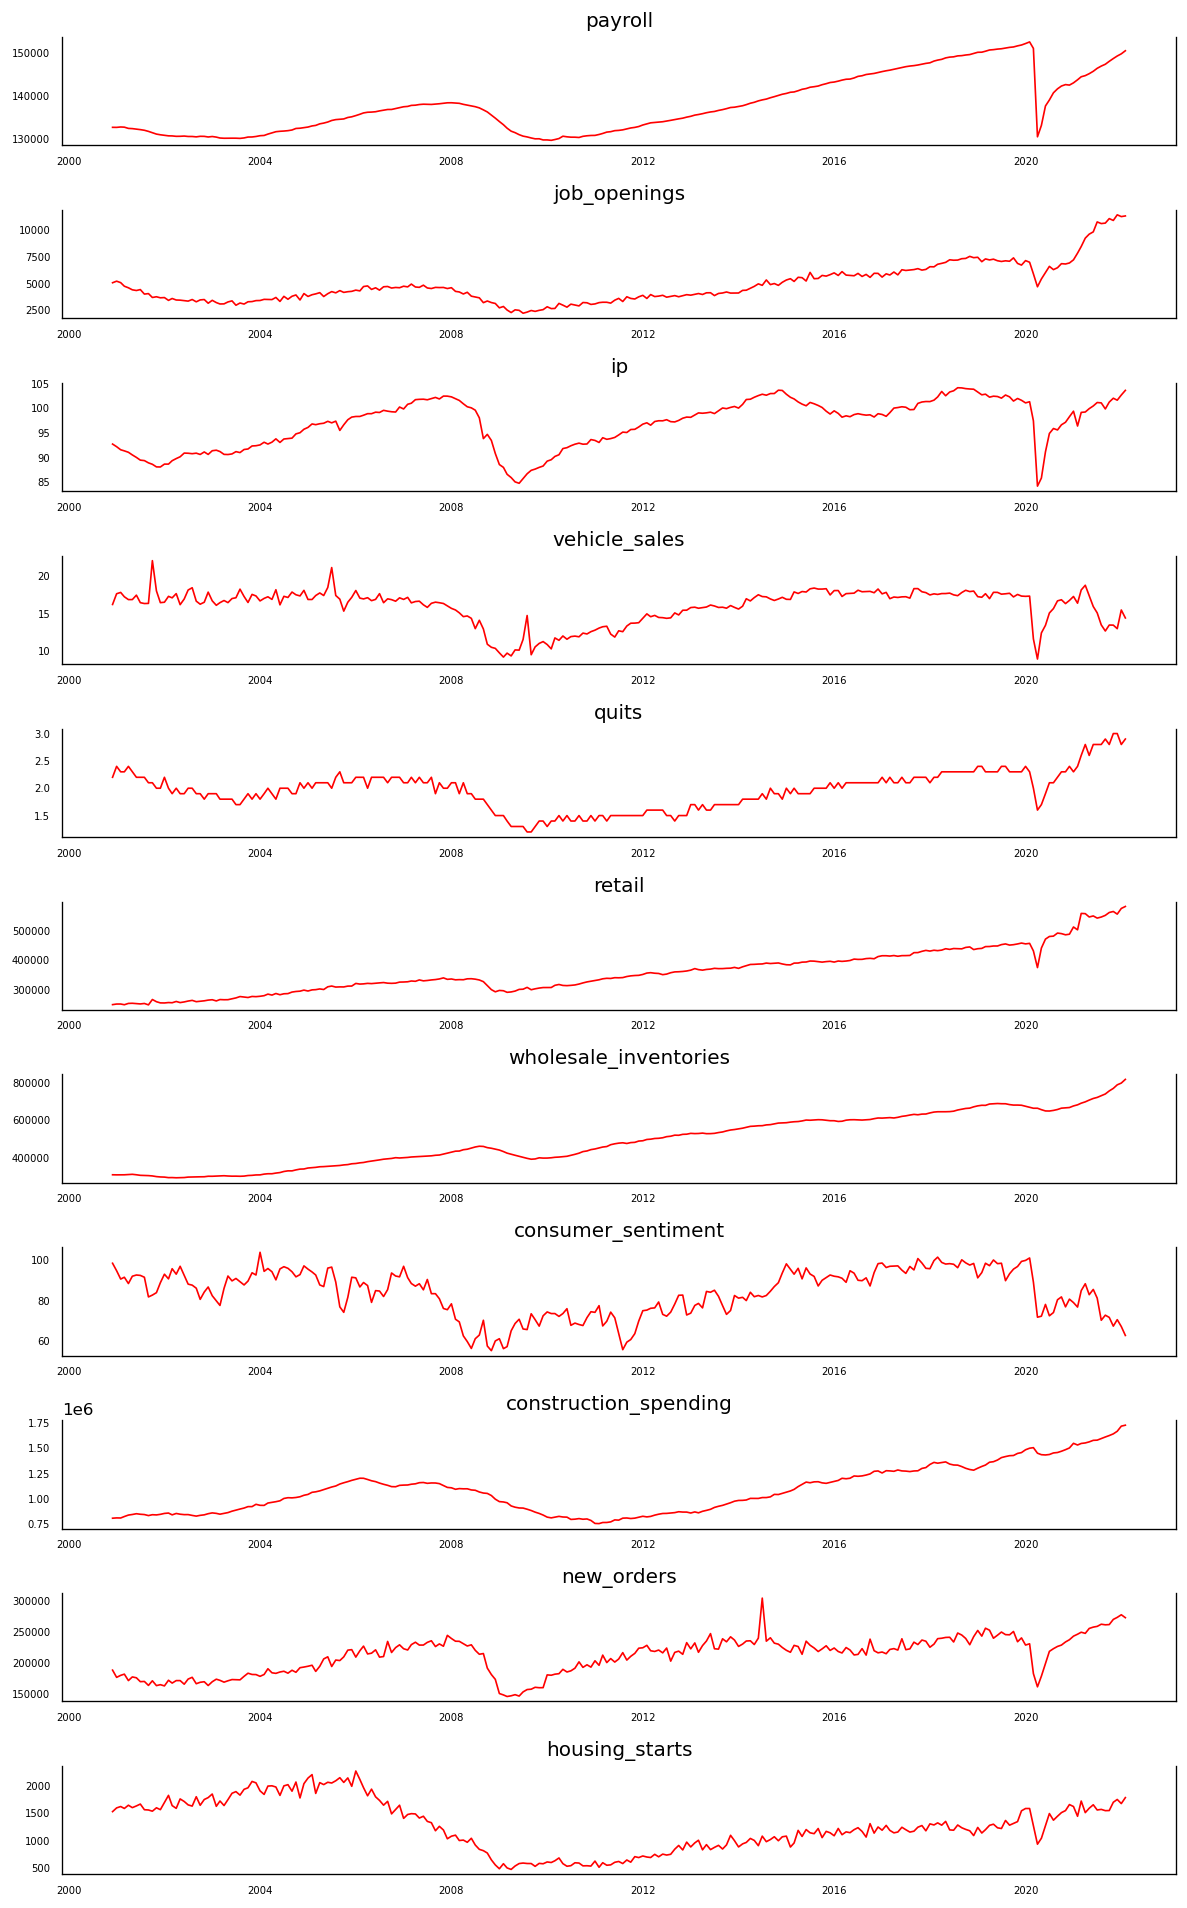

In [4]:
# Plot
fig, axes = plt.subplots(nrows=11, ncols=1, dpi=120, figsize=(10,16))
for i, ax in enumerate(axes.flatten()):
    data = monthly[monthly.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(monthly.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [5]:
# Run ADF tests for all series
adf_payroll = adfuller(monthly["payroll"])
adf_job_openings = adfuller(monthly["job_openings"])
adf_quits = adfuller(monthly["quits"])
adf_retail = adfuller(monthly["retail"])
adf_ip = adfuller(monthly["ip"])
adf_vehicle_sales = adfuller(monthly["vehicle_sales"])
adf_wholesale_inventories = adfuller(monthly["wholesale_inventories"])
adf_consumer_sentiment = adfuller(monthly["consumer_sentiment"])
adf_construction_spending = adfuller(monthly["construction_spending"])
adf_new_orders = adfuller(monthly["new_orders"])
adf_housing_starts = adfuller(monthly["housing_starts"])

# List of data
list_adf = [adf_payroll[0], adf_job_openings[0], adf_quits[0], adf_retail[0], adf_ip[0], adf_vehicle_sales[0], adf_wholesale_inventories[0], adf_consumer_sentiment[0], adf_construction_spending[0], adf_new_orders[0], adf_housing_starts[0], -2.573095980841316]

# DataFrame with ADF tests
adf = pd.DataFrame(list_adf, index=["payroll", "job_openings", "quits", "retail", "ip", "vehicle_sales", "wholesale_inventories", "consumer_sentiment", "construction_spending", "new_orders", "housing_starts", "10% threshold"], columns={"ADF Fuller test"})

adf

,ADF Fuller test
payroll,-0.918527
job_openings,0.904821
quits,-1.083210
retail,1.564151
ip,-1.957387
vehicle_sales,-2.592540
wholesale_inventories,1.113354
consumer_sentiment,-2.279565
construction_spending,0.974425
new_orders,-1.831629


Also, in some of the model alternatives, we can only use the quarterly data. In this sense, to turn the monthly series into quarterly, we perform the following transformations. First, we calculate the quarterly average of each variable and create a quarterly series for them. After this proceeding is done, we perform the log differences for the quarterly series. For GDP, we only need to run the log differences as the series is already quarterly by construction.

Below, we show the quarterly series.

In [6]:
# Normalized DataFrame
normalized_monthly=np.log(monthly).diff()*100

In [7]:
#Adjusting index
normalized_monthly = normalized_monthly.reset_index()
normalized_monthly.set_index('index')

#Turning into quarterly
quarterly = normalized_monthly.groupby(pd.PeriodIndex(normalized_monthly['index'], freq='Q')).mean().reset_index()

# Adjust the gdp data series
df_gdp = pd.DataFrame(gdp).loc[(pd.DataFrame(gdp).index >= '2000-10-01') & (pd.DataFrame(gdp).index <= '2021-10-01')].reset_index().rename(columns={"index": "old_index"})
df_gdp['GDP'] = np.log(df_gdp['GDP']).diff()*100

# Add on a single dataframe
quarterly_all = pd.concat([df_gdp, quarterly], axis=1).drop('old_index', axis=1).set_index('index')
quarterly_all = quarterly_all.dropna()[:-1]

# Finally, we've got the data
quarterly_all

,GDP,payroll,job_openings,ip,vehicle_sales,quits,retail,wholesale_inventories,consumer_sentiment,construction_spending,new_orders,housing_starts
index,,,,,,,,,,,,
2001Q1,0.329925,0.009543,-2.207236,-0.500511,2.044262,1.481725,-0.043913,-0.015097,-2.423394,0.672596,-1.159559,1.238665
2001Q2,1.222357,-0.112685,-2.932212,-0.486808,0.414847,-1.481725,0.488294,0.015636,0.398339,1.095764,-1.089457,0.950674
2001Q3,-0.009247,-0.133298,-2.293757,-0.412019,-2.166557,-1.550667,-0.552672,-0.487928,-4.133730,-0.721291,-2.395150,-1.542906
2001Q4,0.587485,-0.200189,-3.393049,-0.315040,0.203067,-1.626339,0.882632,-0.793410,2.736980,0.485141,0.239002,0.127796
2002Q1,1.147515,-0.067508,-0.594519,0.478147,1.275027,-1.709776,0.066198,-0.371882,2.494388,-0.202176,0.510080,1.537136
...,...,...,...,...,...,...,...,...,...,...,...,...
2020Q3,8.184244,0.948176,2.421341,1.585079,7.227744,4.886782,1.413136,0.394046,0.967471,0.558379,4.300963,4.293566
2020Q4,1.591087,0.202960,2.204496,0.922760,0.115547,2.900379,-0.259720,0.525904,0.124147,1.010769,1.546522,4.574551
2021Q1,2.576810,0.449365,6.689897,0.295912,2.663042,2.668090,4.477619,1.142129,1.691184,0.968967,1.648741,1.260241


## 4. Forecasting methods

In this section, we briefly describe the methodology behind each of the models used. After that discussion, we then delve into the modeling process and the empiric results. Here, we will discuss the following models:

1. Trailing 3-period average

2. Exponential Smoothing

3. ARIMA

4. Simple Linear Regression (OLS)

5. Ridge / Lasso / Elastic Net regressions

6. Dynamic Factor Model

7. Vector Autoregressive (VAR)

8. Random Forest

9. Gradient Boosted Decision Trees

10. K-Nearest Neighbor

11. Support Vector Regression

12. Dense Neural Networks

13. LSTM

#### 4.1 Univariate Models

**Trailing 3-period average**: 

This simple estimator plays the role of a naïve benchmark. It is an average of three periods, which can be 3-months or 3-quarters, depending on the variable used in our analysis.

\begin{align*}
  \hat{\mu}_{t+1} &= \frac{1}{T}\sum^{t=3}_{t=1} {\hat\mu_t}\\
  &\text{where } \hat{\mu}_{t} \text{is the independent variable}\\
\end{align*}

**Exponential Smoothing**: 

A weighted average of lagged values, with weights decaying exponentially the longer the lag. Exponential smoothing takes into account all past data, whereas moving average only takes into account $k$ past data points.


$$ X_{t+1} = \alpha X_{t} + \alpha (1- \alpha) X_{t-1} + \alpha (1- \alpha)^2 X_{t-2} + {...} $$


where $0 \le \alpha \le 1 $ is the smoothing parameter. You choose how many lags to use. We will use four lags here.

**ARIMA**: 

A stochastic process $ \{X_t\} $ is called an *autoregressive moving
average process*, or ARMA($ p,q $), if it can be written as


<a id='equation-arma'></a>
$$
X_t = \phi_1 X_{t-1} + \cdots + \phi_p X_{t-p} +
    \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q}
$$

where $ \{ \epsilon_t \} $ is white noise.

In what follows we **always assume** that the roots of the polynomial $ \phi(z) $ lie outside the unit circle in the complex plane.

This condition is sufficient to guarantee that the ARMA($ p,q $) process is covariance stationary.

In fact, it implies that the process falls within the class of general linear processes.

We define an ARIMA(p, d, q) model as the mixture of an AR(p) and MA(q) model with differencing (to help make the process stationary)

#### 4.2 Linear Regression and Machine Learning Models

**Simple Linear Regression (OLS):**

The most common technique to estimate a linear relationship between variables is Ordinary Least Squares (OLS). OLS model is solved by finding the parameters that minimize the sum of squared residuals.

The model can be defined, in the matrix form, as:

$$
y = X\beta + u
$$

To solve for the unknown parameter $ \beta $, we want to minimize
the sum of squared residuals

$$
\underset{\hat{\beta}}{\min} \hat{u}'\hat{u}
$$

Rearranging the first equation and substituting into the second
equation, we can write

$$
\underset{\hat{\beta}}{\min} \ (Y - X\hat{\beta})' (Y - X\hat{\beta})
$$

Solving this optimization problem gives the solution for the
$ \hat{\beta} $ coefficients

$$
\hat{\beta} = (X'X)^{-1}X'y
$$

**Ridge / Lasso / Elastic Net:**

These models are very closely related to traditional OLS, but they focus on regularization of parameters to avoid overfitting.

The Lasso model generates predictions using but optimizes over a slightly different loss function:

$$
\underset{\hat{\beta}}{\min} \ (Y - X\hat{\beta})' (Y - X\hat{\beta}) + \alpha\hat{\beta}
$$

where $ \alpha $ is the regularization parameter. The additional term penalizes large coefficients and in practice, effectively sets coefficients to zero for features that are not informative about the target.


Ridge regressions places a particular form of constraint on the parameters $\beta$, which is chosen to minimize the penalized sum of squares:

$$
\underset{\hat{\beta}}{\min} \ (Y - X\hat{\beta})' (Y - X\hat{\beta}) + \lambda\hat{\beta}'\hat{\beta}
$$

This means that if the $\beta$ take on large values, the optimization function is penalized, but not zero (only reducing the impact of "irrelevant" features of the model).

The elastic net algorithm uses a weighted combination of Ridge and Lasso forms of regularization. 

#### 4.3 More Complex Econometric Methods

**Vector autoregressions (VARs):**

The Vector Autoregression models (VARs) are an extension of the AR model described before, in a multi-variate form used when two or more time series can influence each other. This parametric model is built as an equation that includes the variable's lagged (past) values, the lagged values of the other variables in the model, and an error term. 

An important part of the VAR models, as it is for the AR version, is the order of the model - the number of lags one wants to include in its model. In the example below we represent as an infinity of lags. However, on the data analysis it would be required that we perform a lag criterion test, such as AIC, PIC and SIC.

In the example of equation below, we describe an VAR model where the $X_t$ an the independent variable, which we are interested in modeling, $X_{t-T}$ are the lags of the independent variable. In the meantime, $Y_{t-T}$ is a matrix that represents all the lagged explanatory variables used in the model. Again $ \{ \epsilon_t \} $ is white noise.

<a id='equation-VAR'></a>
$$
X_t = \phi_1 X_{t-1} + \cdots + \phi_p X_{t-p} + \phi_1 Y_{t-1} + \cdots + \phi_p Y_{t-p} +
    \epsilon_t
$$

**Dynamic Factor Model:**

In a dynamic factor model, we model a potentially large number of macroeconomic series as being driven by a much smaller number of latent factors, which are estimated, which involves a principal component analysis. 

Principal component analysis is an unsupervised algorithm, based on feature correlation, used for dimensionality reduction. The premise is simply to take data of higher dimensions, and reduce to a lower dimension.

Often times, in higher dimensional data, it isn't possible to create visual representations of relationships between variables. Through applying PCA, it then becomes possible to reduce the dimensions of the data and display variable relationships. This tool also allows easier visualization and noise filtering, among other applications.

The PCA must be used when three conditions apply:

1. Reduce the number of variables
2. Ensure that each variable is independent of one another
3. Assume that the interpretation of the independent variables is less important

How does a PCA work?

a. Calculate a matrix that summarizes how the variables are related one another (the covariance matrix).

b. Then separate it between direction (eigenvectors) and magnitude (eigenvalues)

c. By projecting the data into a smaller space, we reduce dimension, but keep the original variables in our model

Mathematically, the first principal component is the direction in space along which projections have the largest variance. The second principal component is the direction which maximizes variance among all directions orthogonal to the first. The k-th component is the variance-maximizing direction orthogonal to the previous k-1 components.

With those principal components, we use them as explanatory variables in an OLS.

For our specific case, we use a state space model to try and explain the GDP data we observe by using only one unobserved factor, extracted from a series of monthly data.

Define our state space model as:

\begin{align*}
  \lambda_{t} &= A \lambda_{t-1} + \eta_t \\
  p_{i, t} &= G_i \lambda_t + \varepsilon_{i, t} \\
  \eta_t &\sim N(0, I) \\
  \varepsilon_t &\sim N(0, \Sigma)
\end{align*}

Note: If we stack our $p_{i, t}$ values, we wind up with

$$P_t = G \lambda_t + \varepsilon_t$$

where $G \equiv \begin{bmatrix} G_1 \\ G_2 \\ \vdots \\ G_I \end{bmatrix}$, $\varepsilon_t \equiv \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_I \end{bmatrix}$

#### 4.4 Nonlinear Algorithms


**Random Forest:**

Description

**Gradient Boosted Decision Trees:**

Description

**K-Nearest Neighbors:**

K Nearest Neighbour is a simple univariate algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified. 

Similarity is defined according to a distance metric between two data points. Distance could be Euclidean, Manhattan, Minkowski, or Hamming distance. We use the Euclidean approach, which is the most widely used distance measure to calculate the distance between test samples and trained data values.

- Euclidean Distance

<a id='euclidean distance'></a>
$$
d(i,j) = \sqrt{ {| x_{i1} - x_{j1} |}^2 + {|x_{i2} - x_{j2}|}^2 + \cdots + {|x_{ip} - x_{jp}|}^2} 
$$

- Minkowski Distance

<a id='minkowski distance'></a>
$$
d(i,j) = ( {| x_{i1} - x_{j1} |}^q + {|x_{i2} - x_{j2}|}^q + \cdots + {|x_{ip} - x_{jp}|}^q )^{1/q}
$$

- Manhattan Distance
<a id='manhattan distance'></a>
$$
d(i,j) = {| x_{i1} - x_{j1} |} + {|x_{i2} - x_{j2}|} + \cdots + {|x_{ip} - x_{jp}|}
$$


From a given k, one can choose the closest neighbors of that given data. For a data record $t$ to be classified, its $k$ nearest neighbours are retrieved, and this forms a neighbourhood of $t$. One needs to choose an appropriate value for $k$, and the success of classification is very much dependent on this value. There are no pre-defined statistical methods to find the most favorable value of K. The only option is to choose different $k$ and select the one with the lowest error. However, we won't proceed like this here to avoid overfitting.



**Support Vector Regression:**

Description

#### 3.5 Neural Networks

**Dense:**

Description

**LSTM:**

Description

## 5. Empirical Results

In this section, we apply the methods described before to the US data we discussed before. In summary, whenever applicable, we will use monthly US economic data to predict the US quarterly GDP growth. 

#### 5.1 Trailing 3-period average (application):

Now, we move to estimate the benchmark of a simple trailing 3-period average predicting future GDP.

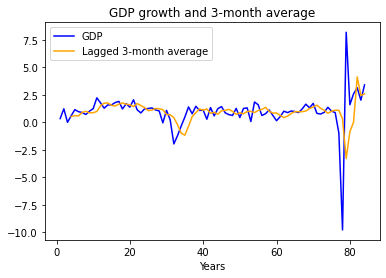

In [8]:
# Define the three month trailing average
df_gdp["3m_avg"] = (df_gdp["GDP"].shift(1).rolling(3).sum()/3)

### in plot method we set the label and color of the curve.
df_gdp['GDP'].plot(label='GDP', color='blue')

df_gdp['3m_avg'].plot(label='Lagged 3-month average', color='orange')
  
# adding title to the plot
plt.title('GDP growth and 3-month average')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [9]:
trailing_rmse = math.sqrt(sklearn.metrics.mean_squared_error(df_gdp['GDP'][40:], df_gdp['3m_avg'][40:]))

print(f"Out-of-Sample RMSE is : {trailing_rmse}")

Out-of-Sample RMSE is : 2.4083075618421033


#### 5.2 Exponential Smoothing (application):

Explain briefly

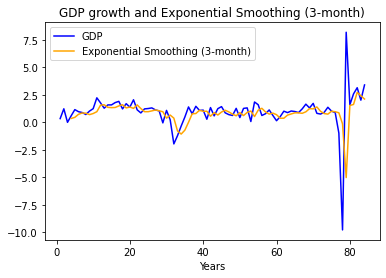

In [10]:
# Define the three month trailing average
df_gdp["exponential"] = 0.5*df_gdp["GDP"].shift(1) + (1-0.5)*0.5*df_gdp["GDP"].shift(2) + (1-0.5)*(0.5**2)*df_gdp["GDP"].shift(3)

### in plot method we set the label and color of the curve.
df_gdp['GDP'].plot(label='GDP', color='blue')

df_gdp["exponential"].plot(label='Exponential Smoothing (3-month)', color='orange')
  
# adding title to the plot
plt.title('GDP growth and Exponential Smoothing (3-month)')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [11]:
exponential_rmse = math.sqrt(sklearn.metrics.mean_squared_error(df_gdp['GDP'][40:], df_gdp["exponential"][40:]))

print(f"In-Sample RMSE is : {exponential_rmse}")

In-Sample RMSE is : 2.509512751787306


#### 5.3 ARIMA models (application):

explain TODO

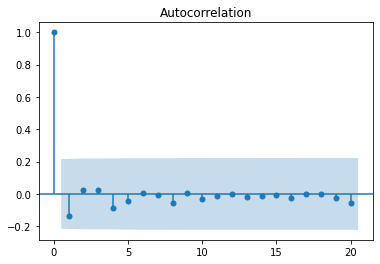

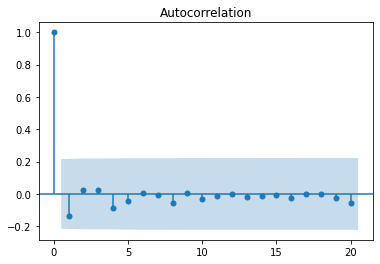

In [12]:
# See autocorrelation
plot_acf(quarterly_all["GDP"])

In [13]:
# Set Model
arima_model = ARIMA(quarterly_all["GDP"], order=(3,0,0))
arima_fit = arima_model.fit()
arima_fit.summary()

C:\Users\19175\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   83
Model:                     ARMA(3, 0)   Log Likelihood                -156.068
Method:                       css-mle   S.D. of innovations              1.586
Date:                Mon, 09 May 2022   AIC                            322.136
Time:                        22:20:33   BIC                            334.230
Sample:                    03-31-2001   HQIC                           326.995
                         - 09-30-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9633      0.158      6.087      0.000       0.653       1.273
ar.L1.GDP     -0.1354      0.110     -1.235      0.217      -0.350       0.080
ar.L2.GDP      0.0086      0.112      0.077      0.939      -0.211       0.228
ar.L3.GDP      0.0253      0.111      0.228      0.820      -0.192       0.243
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0722           -2.4724j            3.2260           -0.3610
AR.2           -2.0722           +2.4724j            3.2260            0.3610
AR.3            3.8040           -0.0000j            3.8040           -0.0000
-----------------------------------------------------------------------------
"""

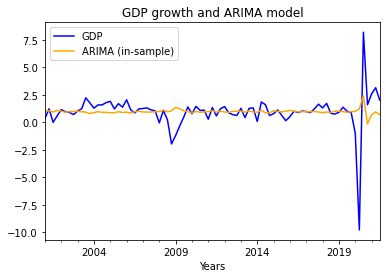

In [14]:
# Get data
quarterly_constant = sm.add_constant(quarterly_all)

# Create Series
arima_fitted = pd.DataFrame(arima_fit.fittedvalues, columns = ['ARIMA In-Sample'])
quarterly_arima = pd.concat([quarterly_constant.reset_index(), arima_fitted.reset_index().drop("index", axis=1)], axis=1).set_index('index')

### in plot method we set the label and color of the curve.
quarterly_arima['GDP'].plot(label='GDP', color='blue')
quarterly_arima['ARIMA In-Sample'].plot(label='ARIMA (in-sample)', color='orange')
  
# adding title to the plot
plt.title('GDP growth and ARIMA model')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [78]:
# Separate test and train
X_arima=sm.add_constant(quarterly_all.drop(["GDP"], axis=1))
y_arima=quarterly_all['GDP']

# Create test and train
X_train_arima, X_test_arima, y_train_arima, y_test_arima = train_test_split(X_arima, y_arima, shuffle=False, train_size=40)

# Fit model
arima_model_out = ARIMA(y_train_arima, order=(3,0,0)).fit()
arima_model_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   40
Model:                     ARMA(3, 0)   Log Likelihood                 -38.105
Method:                       css-mle   S.D. of innovations              0.623
Date:                Mon, 09 May 2022   AIC                             86.210
Time:                        22:31:25   BIC                             94.654
Sample:                    03-31-2001   HQIC                            89.263
                         - 12-31-2010                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9374      0.270      3.469      0.001       0.408       1.467
ar.L1.GDP      0.5970      0.158      3.767      0.000       0.286       0.908
ar.L2.GDP      0.0062      0.193      0.032      0.974      -0.371       0.384
ar.L3.GDP      0.0502      0.163      0.307      0.758      -0.270       0.370
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4157           -0.0000j            1.4157           -0.0000
AR.2           -0.7696           -3.6716j            3.7514           -0.2829
AR.3           -0.7696           +3.6716j            3.7514            0.2829
-----------------------------------------------------------------------------
"""

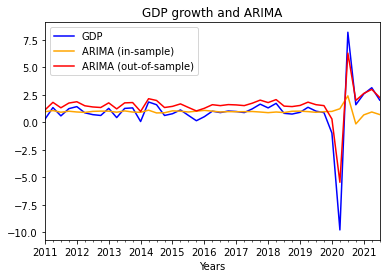

In [80]:
### in plot method we set the label and color of the curve.
quarterly_all['GDP'][40:].plot(label='GDP', color='blue')
quarterly_arima['ARIMA In-Sample'][40:].plot(label='ARIMA (in-sample)', color='orange')
out_of_sample_arima = 0.9374 + 	0.5970*quarterly_all['GDP'] + 0.0062*quarterly_all['GDP'] + 0.0502*quarterly_all['GDP']
out_of_sample_arima[40:].plot(label='ARIMA (out-of-sample)', color='red')

# adding title to the plot
plt.title('GDP growth and ARIMA')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [82]:
#errors
arima_rmse_out_sample = math.sqrt(sklearn.metrics.mean_squared_error(quarterly_all['GDP'][40:], out_of_sample_arima[40:] ))
arima_rmse_in_sample = math.sqrt(sklearn.metrics.mean_squared_error(quarterly_all['GDP'][40:], quarterly_arima['ARIMA In-Sample'][40:]))

print(f"Out-of-Sample RMSE is : {arima_rmse_out_sample}")
print(f"In-Sample RMSE is : {arima_rmse_in_sample}")

Out-of-Sample RMSE is : 0.9407263382716538
In-Sample RMSE is : 2.0377395822705786


#### 5.4 OLS models (application):

explain briefly

In [49]:
# Run regression
ols_model = smf.ols(formula='GDP ~ payroll + job_openings + ip + vehicle_sales + quits + retail + wholesale_inventories + consumer_sentiment + construction_spending + new_orders + housing_starts', data = quarterly_constant).fit()
ols_results = ols_model.get_robustcov_results(cov_type='HAC',maxlags=1)
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.43e-43
Time:                        22:29:55   Log-Likelihood:                -74.847
No. Observations:                  83   AIC:                             173.7
Df Residuals:                      71   BIC:                             202.7
Df Model:                          11                                         
Covariance Type:                  HAC                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7831      0.105      7.485      0.000       0.574       0.992
payroll                   3.2475      0.350      9.269      0.000       2.549       3.946
job_openings             -0.0778      0.037     -2.082      0.041      -0.152      -0.003
ip                        0.4823      0.190      2.538      0.013       0.103       0.861
vehicle_sales            -0.0002      0.051     -0.004      0.997      -0.102       0.102
quits                     0.0945      0.038      2.502      0.015       0.019       0.170
retail                    0.1745      0.090      1.948      0.055      -0.004       0.353
wholesale_inventories    -0.0400      0.180     -0.222      0.825      -0.399       0.319
consumer_sentiment        0.0122      0.025      0.497      0.620      -0.037       0.061
construction_spending     0.0055      0.081      0.068      0.946      -0.157       0.168
new_orders                0.0019      0.041      0.046      0.964      -0.080       0.083
housing_starts           -0.0067      0.020     -0.330      0.742      -0.047       0.034
==============================================================================
Omnibus:                       45.662   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.746
Skew:                           1.613   Prob(JB):                     7.73e-46
Kurtosis:                      10.047   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

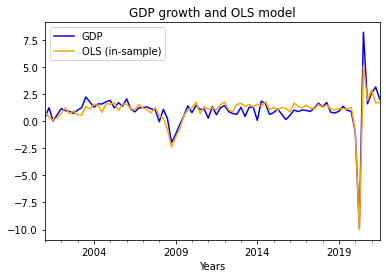

In [50]:
# Create Series
ols_fitted = pd.DataFrame(ols_results.fittedvalues, columns = ['OLS In-Sample'])
quarterly_ols = pd.concat([quarterly_constant.reset_index(), ols_fitted], axis=1).set_index('index')

### in plot method we set the label and color of the curve.
quarterly_ols['GDP'].plot(label='GDP', color='blue')
quarterly_ols['OLS In-Sample'].plot(label='OLS (in-sample)', color='orange')
  
# adding title to the plot
plt.title('GDP growth and OLS model')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

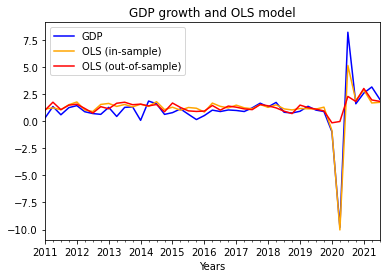

In [51]:
# Create out of sample
ols_restrict = smf.ols(formula='GDP ~ payroll + job_openings + ip + vehicle_sales + quits + retail + wholesale_inventories + consumer_sentiment + construction_spending + new_orders + housing_starts', data = quarterly_constant[:-43]).fit()
ols_restrict_results = ols_restrict.get_robustcov_results(cov_type='HAC',maxlags=1)

ols_restrict_results.summary()

### in plot method we set the label and color of the curve.

quarterly_ols['GDP'][40:].plot(label='GDP', color='blue')
quarterly_ols['OLS In-Sample'][40:].plot(label='OLS (in-sample)', color='orange')

out_of_sample_ols = 0.8303 + -0.0451*quarterly_constant['payroll'] + 0.0057*quarterly_constant['job_openings'] + 0.3213*quarterly_constant['ip'] + -0.0471*quarterly_constant['vehicle_sales'] + 0.1144*quarterly_constant['quits'] + 0.2695*quarterly_constant['retail'] + 0.2607*quarterly_constant['wholesale_inventories'] + 0.0128*quarterly_constant['consumer_sentiment'] + 0.3316*quarterly_constant['construction_spending'] + 0.0405*quarterly_constant['new_orders'] + -0.0271*quarterly_constant['housing_starts'] 
out_of_sample_ols[40:].plot(label='OLS (out-of-sample)', color='red')

# adding title to the plot
plt.title('GDP growth and OLS model')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [52]:
#errors
ols_rmse_out_sample = math.sqrt(sklearn.metrics.mean_squared_error(quarterly_ols['GDP'][40:], out_of_sample_ols[40:] ))
ols_rmse_in_sample = math.sqrt(sklearn.metrics.mean_squared_error(quarterly_ols['GDP'][40:], quarterly_ols['OLS In-Sample'][40:]))

print(f"Out-of-Sample RMSE is : {ols_rmse_out_sample}")
print(f"In-Sample RMSE is : {ols_rmse_in_sample}")

Out-of-Sample RMSE is : 1.8111619304774078
In-Sample RMSE is : 0.6992147870230321


#### 5.5 Elastic Net models (application):

explain briefly


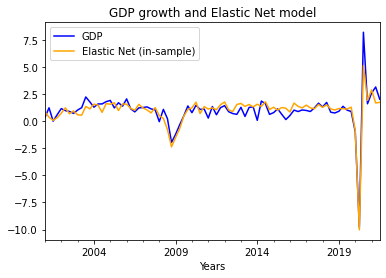

In [53]:
# Run regression
elastic_model = smf.ols(formula='GDP ~ payroll + job_openings + ip + vehicle_sales + quits + retail + wholesale_inventories + consumer_sentiment + construction_spending + new_orders + housing_starts', data = quarterly_constant).fit_regularized(method='elastic_net')

# Create Series
elastic_fitted = pd.DataFrame(elastic_model.fittedvalues, columns = ['Elastic Net In-Sample'])
quarterly_elastic = pd.concat([quarterly_constant.reset_index(), elastic_fitted.reset_index().drop(["index"], axis=1)], axis=1).set_index('index')

### in plot method we set the label and color of the curve.
quarterly_elastic['GDP'].plot(label='GDP', color='blue')
quarterly_elastic['Elastic Net In-Sample'].plot(label='Elastic Net (in-sample)', color='orange')
  
# adding title to the plot
plt.title('GDP growth and Elastic Net model')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()


In [75]:
# Separate test and train
X_elastic=sm.add_constant(quarterly_all.drop(["GDP"], axis=1))
y_elastic=quarterly_all['GDP']

# Create test and train
X_train_elastic, X_test_elastic, y_train_elastic, y_test_elastic = train_test_split(X_elastic, y_elastic, shuffle=False, train_size=40)

# Fit model
elastic_model_out = sm.OLS(y_train_elastic, X_train_elastic).fit_regularized(method='elastic_net')

# Define series
train_preds_elastic = elastic_model_out.predict(X_train_elastic)
test_preds_elastic = elastic_model_out.predict(X_test_elastic)

# Results
test_results_elastic=pd.DataFrame(test_preds_elastic, y_test_elastic.index).rename(columns = {0 : "Predict Elastic"})

# Append GDP
test_results_elastic["GDP"] = quarterly_all['GDP'][40:]

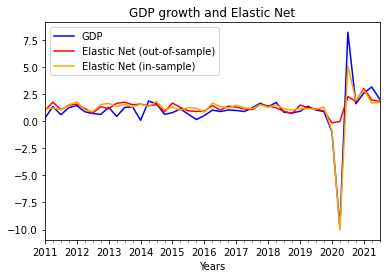

In [76]:
### in plot method we set the label and color of the curve.
test_results_elastic['GDP'].plot(label='GDP', color='blue')
test_results_elastic["Predict Elastic"].plot(label='Elastic Net (out-of-sample)', color='red')
quarterly_elastic['Elastic Net In-Sample'][40:].plot(label='Elastic Net (in-sample)', color='orange')
    
# adding title to the plot
plt.title('GDP growth and Elastic Net')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

#### 5.6 VAR models (application):

Placeholder for explanation steps

In [55]:
# Select numbers of lags
var = VAR(quarterly_all)
x = var.select_order()
x.summary()

,AIC,BIC,FPE,HQIC
0,1.780,2.143*,5.931,1.925
1,-1.327,3.386,0.2753,0.5594
2,-1.390,7.674,0.3298,2.238
3,-1.881,11.53,0.4109,3.489
4,-3.414,14.35,0.4637,3.698
5,-9.967*,12.15,0.02956*,-1.113*


In [56]:
#5 lags
model_fitted = var.fit(5)
# We can check the summary of the model by
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 09, May, 2022
Time:                     22:29:58
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    12.1497
Nobs:                     78.0000    HQIC:                  -1.11330
Log likelihood:          -207.411    FPE:                  0.0295648
AIC:                     -9.96707    Det(Omega_mle):     2.88226e-05
--------------------------------------------------------------------
Results for equation GDP
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                           -0.920589         0.723682           -1.272           0.203
L1.GDP                           0.806867         0.414933            1.945           0.052
L1.payroll        

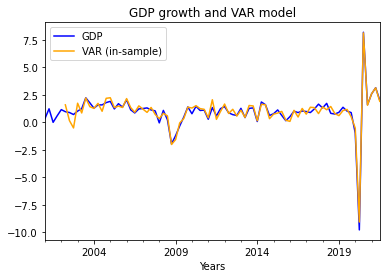

In [57]:
# Fitted values in sample
var_quarterly = model_fitted.fittedvalues

### in plot method we set the label and color of the curve.
quarterly_all['GDP'].plot(label='GDP', color='blue')
var_quarterly['GDP'].plot(label='VAR (in-sample)', color='orange')
  
# adding title to the plot
plt.title('GDP growth and VAR model')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [58]:
# Create out of sample
var_restrict = VAR(quarterly_all[:-43])

# 5 lags
model_fitted_restrict = var_restrict.fit(2)

# Out of sample part of out of sample model
lag_order2 = model_fitted_restrict.k_ar

# Input data for forecasting
forecast_input2 = quarterly_all[:-43].values

fc2 = model_fitted_restrict.forecast(y=forecast_input2, steps=41)

var_quarterly_restrict_out = pd.DataFrame(fc2, index=quarterly_all.index[-41:], columns=quarterly_all.columns)

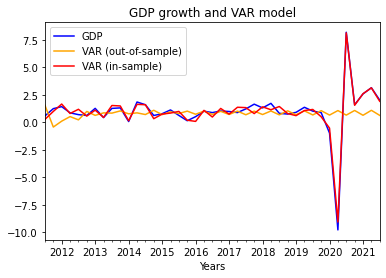

In [59]:
### in plot method we set the label and color of the curve.
quarterly_all['GDP'][42:].plot(label='GDP', color='blue')
var_quarterly_restrict_out['GDP'].plot(label='VAR (out-of-sample)', color='orange')
var_quarterly['GDP'][37:].plot(label='VAR (in-sample)', color='red')
  
# adding title to the plot
plt.title('GDP growth and VAR model')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [60]:
#errors
var_rmse_out_sample = math.sqrt(sklearn.metrics.mean_squared_error(quarterly_all['GDP'][42:], var_quarterly['GDP'][37:]))
var_rmse_in_sample = math.sqrt(sklearn.metrics.mean_squared_error(quarterly_all['GDP'][42:], var_quarterly_restrict_out['GDP']))

print(f"Out-of-Sample RMSE is : {var_rmse_out_sample}")
print(f"In-Sample RMSE is : {var_rmse_in_sample}")

Out-of-Sample RMSE is : 0.32033526538225743
In-Sample RMSE is : 2.206971744405514


#### 5.4 Dynamic Factor Model (application):

Placeholder

In [61]:
# Remove the index to run the algorithm
normalized_monthly_adjust = normalized_monthly.set_index('index')
normalized_data = normalized_monthly_adjust.reset_index(drop=True)

# Build and fit dynamic factor model using an EM algorithm
mod = sm.tsa.DynamicFactorMQ(normalized_data, factors=1, factor_orders=3)

res = mod.fit(disp=10)

EM start iterations, llf=-3530.5
EM iteration 10, llf=-3450.3, convergence criterion=3.8119e-05
EM iteration 20, llf=-3449.7, convergence criterion=1.0243e-05
EM iteration 30, llf=-3449.4, convergence criterion=4.5627e-06
EM iteration 40, llf=-3449.3, convergence criterion=2.581e-06
EM iteration 50, llf=-3449.3, convergence criterion=1.687e-06
EM iteration 60, llf=-3449.2, convergence criterion=1.2151e-06
EM converged at iteration 68, llf=-3449.2, convergence criterion=9.8307e-07 < tolerance=1e-06


In [62]:
# Summary of the model with factor loadings
res.summary()

Dep. Variable:,"""payroll"", and 10 more",No. Observations:,255
Model:,Dynamic Factor Model,Log Likelihood,-3449.177
,+ 1 factors in 1 blocks,AIC,6972.354
,+ AR(1) idiosyncratic,BIC,7103.381
Date:,"Mon, 09 May 2022",HQIC,7025.058
Time:,22:30:00,EM Iterations,68
Sample:,0,,
,- 255,,
Covariance Type:,Not computed,,
Factor loadings:,0,idiosyncratic: AR(1),var.
payroll,-0.43,-0.11,0.31


In [63]:
# Add factor to the dataframe of all series
factor = res.factors["smoothed"].rename({"0": "dfm"}, axis='columns')

normalized_with_factors = pd.concat([normalized_monthly.reset_index(), factor], axis=1).set_index('index')

#Adjusting index
normalized_with_factors = normalized_with_factors.reset_index()
normalized_with_factors.set_index('index')

# Put data on a quarterly basis
quarterly = normalized_with_factors.groupby(pd.PeriodIndex(normalized_with_factors['index'], freq='Q')).mean().reset_index()

# Adjust the gdp data series
df_gdp = pd.DataFrame(gdp).loc[(pd.DataFrame(gdp).index >= '2000-10-01') & (pd.DataFrame(gdp).index <= '2021-10-01')].reset_index().rename(columns={"index": "old_index"})

df_gdp['GDP'] = np.log(df_gdp['GDP']).diff()*100

# Add on a single dataframe
quarterly_all_factor = pd.concat([df_gdp, quarterly], axis=1).drop('old_index', axis=1).set_index('index')
quarterly_all_factor = quarterly_all_factor.dropna()[:-1]

# Finally, we've got the data
quarterly_all_factor.tail()


,GDP,level_0,payroll,job_openings,ip,vehicle_sales,quits,retail,wholesale_inventories,consumer_sentiment,construction_spending,new_orders,housing_starts,dfm
index,,,,,,,,,,,,,,
2020Q3,8.184244,236.0,0.948176,2.421341,1.585079,7.227744,4.886782,1.413136,0.394046,0.967471,0.558379,4.300963,4.293566,-2.070344
2020Q4,1.591087,239.0,0.202960,2.204496,0.922760,0.115547,2.900379,-0.259720,0.525904,0.124147,1.010769,1.546522,4.574551,-0.743871
2021Q1,2.576810,242.0,0.449365,6.689897,0.295912,2.663042,2.668090,4.477619,1.142129,1.691184,0.968967,1.648741,1.260241,-1.649417
2021Q2,3.138917,245.0,0.291137,4.998801,0.437010,-4.320419,2.470266,-0.511995,1.187594,0.234743,0.654577,1.077530,-1.340610,-0.345888
2021Q3,2.008565,248.0,0.370847,2.668090,-0.202931,-7.612052,1.169711,0.119586,1.095171,-5.360014,0.689639,0.473982,-2.225127,0.200541


In [64]:
# Regression of factor model
quarterly_all_factor = sm.add_constant(quarterly_all_factor)
regression_factor = sm.OLS(quarterly_all_factor['GDP'],quarterly_all_factor[['dfm', 'const']], missing='drop').fit()
regression_factor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     73.53
Date:                Mon, 09 May 2022   Prob (F-statistic):           5.50e-13
Time:                        22:30:00   Log-Likelihood:                -130.07
No. Observations:                  83   AIC:                             264.1
Df Residuals:                      81   BIC:                             269.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dfm           -1.5685      0.183     -8.575      0.000      -1.932      -1.205
const          0.9935      0.129      7.707      0.000       0.737       1.250
==============================================================================
Omnibus:                       82.444   Durbin-Watson:                   2.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1593.869
Skew:                          -2.668   Prob(JB):                         0.00
Kurtosis:                      23.794   Cond. No.                         1.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Merge with predict series
quarterly_predict = quarterly_all_factor.reset_index()
regression_fit = pd.DataFrame(regression_factor.predict(), columns = ['Predict'])
quarterly_predict = pd.concat([quarterly_predict, regression_fit], axis=1).set_index('index')
quarterly_predict.head()

,const,GDP,level_0,payroll,job_openings,ip,vehicle_sales,quits,retail,wholesale_inventories,consumer_sentiment,construction_spending,new_orders,housing_starts,dfm,Predict
index,,,,,,,,,,,,,,,,
2001Q1,1.0,0.329925,2.0,0.009543,-2.207236,-0.500511,2.044262,1.481725,-0.043913,-0.015097,-2.423394,0.672596,-1.159559,1.238665,0.495542,0.216234
2001Q2,1.0,1.222357,5.0,-0.112685,-2.932212,-0.486808,0.414847,-1.481725,0.488294,0.015636,0.398339,1.095764,-1.089457,0.950674,0.467943,0.259524
2001Q3,1.0,-0.009247,8.0,-0.133298,-2.293757,-0.412019,-2.166557,-1.550667,-0.552672,-0.487928,-4.133730,-0.721291,-2.395150,-1.542906,0.922908,-0.454095
2001Q4,1.0,0.587485,11.0,-0.200189,-3.393049,-0.315040,0.203067,-1.626339,0.882632,-0.793410,2.736980,0.485141,0.239002,0.127796,0.373323,0.407937
2002Q1,1.0,1.147515,14.0,-0.067508,-0.594519,0.478147,1.275027,-1.709776,0.066198,-0.371882,2.494388,-0.202176,0.510080,1.537136,-0.042986,1.060922


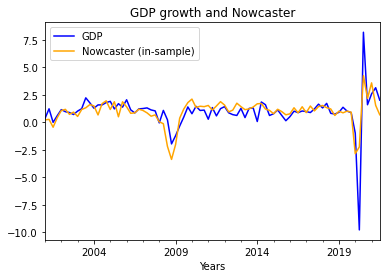

In [66]:
### in plot method we set the label and color of the curve.
quarterly_predict['GDP'].plot(label='GDP', color='blue')
quarterly_predict['Predict'].plot(label='Nowcaster (in-sample)', color='orange')
  
# adding title to the plot
plt.title('GDP growth and Nowcaster')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [67]:
# Now, we run with the train sample from 2000 to 2010
quarterly_restrict = quarterly_all_factor[:-43]
regression_factor_train = sm.OLS(quarterly_restrict['GDP'], quarterly_restrict[['dfm', 'const']]).fit()
regression_factor_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     65.33
Date:                Mon, 09 May 2022   Prob (F-statistic):           8.87e-10
Time:                        22:30:00   Log-Likelihood:                -28.157
No. Observations:                  40   AIC:                             60.31
Df Residuals:                      38   BIC:                             63.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dfm           -0.9063      0.112     -8.083      0.000      -1.133      -0.679
const          1.1064      0.081     13.584      0.000       0.942       1.271
==============================================================================
Omnibus:                        0.029   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.178
Skew:                           0.054   Prob(JB):                        0.915
Kurtosis:                       2.691   Cond. No.                         1.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

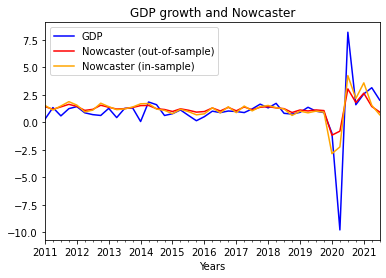

In [68]:
### in plot method we set the label and color of the curve.
quarterly_predict['GDP'][40:].plot(label='GDP', color='blue')

out_of_sample_dfm = -0.93*quarterly_predict['dfm'] + 1.1081
out_of_sample_dfm[40:].plot(label='Nowcaster (out-of-sample)', color='red')

quarterly_predict['Predict'][40:].plot(label='Nowcaster (in-sample)', color='orange')
  
# adding title to the plot
plt.title('GDP growth and Nowcaster')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [69]:
dfm_rmse_out_sample = math.sqrt(sklearn.metrics.mean_squared_error(quarterly_predict['GDP'][40:], out_of_sample_dfm[40:]))
dfm_rmse_in_sample = math.sqrt(sklearn.metrics.mean_squared_error(quarterly_predict['GDP'][40:], quarterly_predict['Predict'][40:]))

print(f"Out-of-Sample RMSE is : {dfm_rmse_out_sample}")
print(f"In-Sample RMSE is : {dfm_rmse_in_sample}")

Out-of-Sample RMSE is : 1.6717869752834398
In-Sample RMSE is : 1.457240485316347


#### 5.7 K-Nearest Neighbor (application):

Placeholder

In [70]:
# Separate test and train
X1=quarterly_all.drop(["GDP"], axis=1)
y1=quarterly_all['GDP']

# Create test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, shuffle=False, train_size=82)

# Fit model
knn_model1 = KNeighborsRegressor(n_neighbors=3)
knn_model1.fit(X_train1, y_train1)

# Define series
train_preds1 = knn_model1.predict(X_train1)
test_preds1 = knn_model1.predict(X_test1)

# Results
train_results1=pd.DataFrame(train_preds1, y_train1.index).rename(columns = {0 : "In-Sample"})

# Append GDP
train_results1["GDP"] = quarterly_predict['GDP']
train_results1["In-Sample"] = train_results1["In-Sample"]

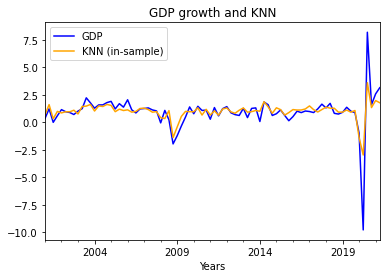

In [71]:
### in plot method we set the label and color of the curve.
train_results1['GDP'].plot(label='GDP', color='blue')
train_results1["In-Sample"].plot(label='KNN (in-sample)', color='orange')
  
# adding title to the plot
plt.title('GDP growth and KNN')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [72]:
# Separate test and train
X=quarterly_all.drop(["GDP"], axis=1)
y=quarterly_all['GDP']

# Create test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, train_size=40)

# Fit model
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Define series
train_preds = knn_model.predict(X_train)
test_preds = knn_model.predict(X_test)

# Results
test_results=pd.DataFrame(test_preds, y_test.index).rename(columns = {0 : "Predict"})

# Append GDP
test_results["GDP"] = quarterly_predict['GDP'][40:]

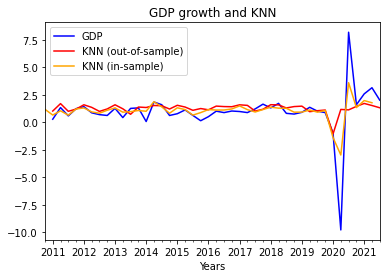

In [73]:
### in plot method we set the label and color of the curve.
test_results['GDP'].plot(label='GDP', color='blue')
test_results["Predict"].plot(label='KNN (out-of-sample)', color='red')
train_results1["In-Sample"][39:].plot(label='KNN (in-sample)', color='orange') 
    
# adding title to the plot
plt.title('GDP growth and KNN')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()


In [74]:
knn_rmse_out_sample = math.sqrt(sklearn.metrics.mean_squared_error(test_results['GDP'], test_results["Predict"]))
knn_rmse_in_sample = math.sqrt(sklearn.metrics.mean_squared_error(test_results['GDP'], train_results1["In-Sample"][39:]))

print(f"Out-of-Sample RMSE is : {knn_rmse_out_sample}")
print(f"In-Sample RMSE is : {knn_rmse_in_sample}")

Out-of-Sample RMSE is : 2.068752100853494
In-Sample RMSE is : 2.234026551046417


## 6. Conclusion

## 7. References

Biau, O. and D’Elia, A., (2011), ”Euro area GDP forecasting using large survey datasets”. 

Cook, Thomas R., and Aaron Smalter Hall. “Macroeconomic Indicator Forecasting with Deep Neural Networks.” Federal Reserve Bank of Kansas City, Research Working Paper 17-11, September. Available at External Link https://doi.org/10.18651/RWP2017-11

Rodríguez-Vargas, A. (2020). Forecasting Costa Rican Inflation With Machine Learning Methods. Latin Am. J. Cent. Banking. 1, 100012. doi:10.1016/j.latcb.2020.100012 

Ban, T., Zhang, R., Pang, S., Sarrafzadeh, A., and Inoue, D. (2013). “Referential Knn Regression for Financial Time Series Forecasting,” in International Conference on Neural Information Processing (Springer), 601–608. doi:10.1007/978-3-642-42054-2_75

Diebold, F. X., and Nason, J. A. (1990). Nonparametric Exchange Rate Prediction? J. Int. Econ. 28, 315–332. doi:10.1016/0022-1996(90)90006-8

Lee, T. H., White, H., and Granger, C. W. J. (1993). Testing for neglected nonlinearity in time series models. A comparison of neural network methods and alternative tests. Journal of Econometrics, 56(3):269–290. 

Stone, C. J. (1977). Consistent Nonparametric Regression. Ann. Stat. 5, 595–620. doi:10.1214/aos/1176343886

Swanson, N. R. and White, H. (1997). A Model Selection Approach To Real-Time Macroeconomic Forecasting Using Linear Models And Artificial Neural Networks. The Review of Economics and Statistics, 79(4):540–550. 

FRED, federal reserve economic data. St. Louis, MO: Federal Reserve Bank of St. Louis, 1997. Software, E-Resource. https://lccn.loc.gov/98802805.

Guo, G., Wang, H., Bell, D., Bi, Y., Greer, K. (2003). KNN Model-Based Approach in Classification. In: Meersman, R., Tari, Z., Schmidt, D.C. (eds) On The Move to Meaningful Internet Systems 2003: CoopIS, DOA, and ODBASE. OTM 2003. Lecture Notes in Computer Science, vol 2888. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-540-39964-3_62

https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

https://python-advanced.quantecon.org/arma.html

https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-two/

Towards Science: A One-Stop Shop for Principal Component Analysis (https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c).

In Depth: Principal Component Analysis (https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

Advanced Data Analysis from an Elementary Point of View (https://www.stat.cmu.edu/~cshalizi/uADA/15/lectures/17.pdf).

Applications of Principal Component Analysis (PCA) (https://iq.opengenus.org/applications-of-pca/).

https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e